In [1]:
import pandas as pd
import numpy as np

In [12]:
#pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#get_ipython().run_line_magic('matplotlib', 'inline') Alternative command
from scipy import stats
import statsmodels.api as sm

In [4]:
marketing_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/marketing_cva_f.csv')
marketing_df

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507
...,...,...,...,...,...,...,...,...,...,...,...,...
6812,TF56202,California,5032.165498,Basic,66367,Suburban,64,6,48,307.200000,Two-Door Car,37.492591
6813,YM19146,California,4100.398533,Premium,47761,Suburban,104,16,58,541.282007,Four-Door Car,48.946675
6814,LA72316,California,23405.987980,Basic,71941,Urban,73,18,89,198.234764,Four-Door Car,65.310053
6815,PK87824,California,3096.511217,Extended,21604,Suburban,79,14,28,379.200000,Four-Door Car,48.002914


In [5]:
print('Missing values: ', marketing_df.isnull().any())

Missing values:  Customer                         False
State                            False
CLV                              False
Coverage                         False
Income                           False
loc_type                         False
monthly_premium                  False
months_last_claim                False
Months_Since_Policy_Inception    False
Total_Claim_Amount               False
Vehicle_Class                    False
avg_vehicle_age                  False
dtype: bool


In [6]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       6817 non-null   object 
 1   State                          6817 non-null   object 
 2   CLV                            6817 non-null   float64
 3   Coverage                       6817 non-null   object 
 4   Income                         6817 non-null   int64  
 5   loc_type                       6817 non-null   object 
 6   monthly_premium                6817 non-null   int64  
 7   months_last_claim              6817 non-null   int64  
 8   Months_Since_Policy_Inception  6817 non-null   int64  
 9   Total_Claim_Amount             6817 non-null   float64
 10  Vehicle_Class                  6817 non-null   object 
 11  avg_vehicle_age                6817 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage:

<AxesSubplot:xlabel='avg_vehicle_age', ylabel='Density'>

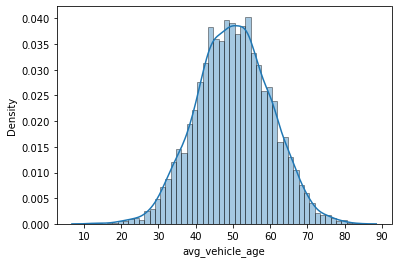

In [9]:
sns.distplot(marketing_df['avg_vehicle_age'], hist=True , hist_kws=dict(ec="k"))
# last argument used to create black lines in bars of histograms

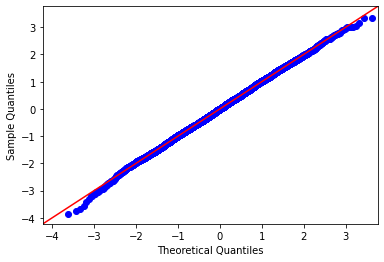

In [12]:
# Quantile-Quantile plot prb plot , by plotting the quantiles of underlying Data
plot = sm.qqplot(marketing_df['avg_vehicle_age'] , line='45' , fit=True)

<AxesSubplot:xlabel='avg_vehicle_age'>

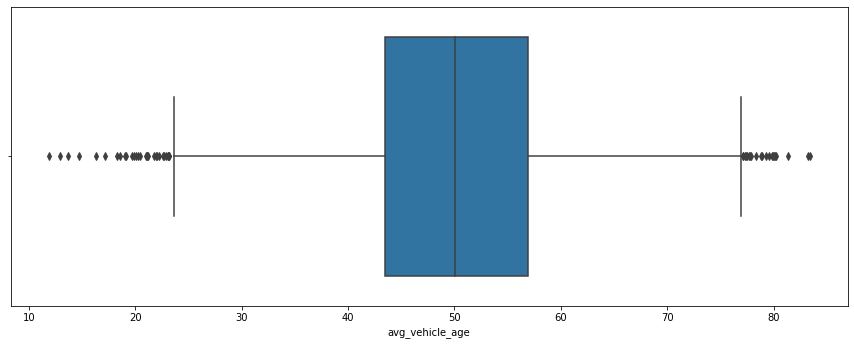

In [15]:
plt.figure(figsize = (15,5.5))
sns.boxplot(marketing_df['avg_vehicle_age'])

# Note:
Above ways are visuall ways to check the distribution , but below we use a statistical test to check weather it is normally distributed

# 1.method
Null : Data came from normal dist

Alternate : Data do not came from normal dist

In [17]:
# This function calculates weather the sample differs from normal dist
chi2 , p = stats.normaltest(marketing_df['avg_vehicle_age'])
print("Chi : %.2f , p-value : %.3f"%(chi2,p))
# based on p our Ho is true ( It is from normal dist)

Chi : 1.04 , p-value : 0.593


# 2.method

Null : Data is drawn from a particular dist ( we will specify )

Alternate : Data is not drawn from a particuar dist

In [19]:
# Andersorn test checks weather a sample cames from a particular dist
stats.anderson(marketing_df['avg_vehicle_age'], dist='norm')

# statistics is less than ciritical val(0.787) means our null hypothesis is True

AndersonResult(statistic=0.38327277704684093, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# What if our Data is not normal then what transformations to do

In [20]:
_ , l = stats.boxcox(marketing_df['avg_vehicle_age'])
print(l)

1.0401662851027633


### Table
-2   : 1/input^l

-1   : 1/input

-0.5 : 1/input SQRT(l)

0    : log(input)

0.5  : input SQRT(l)

1    : As it is

2  : input^l

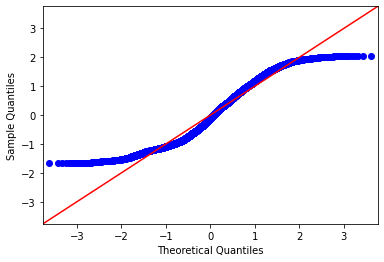

In [22]:
plot = sm.qqplot(marketing_df['Income'], line='45', fit = True)

<AxesSubplot:xlabel='Income'>

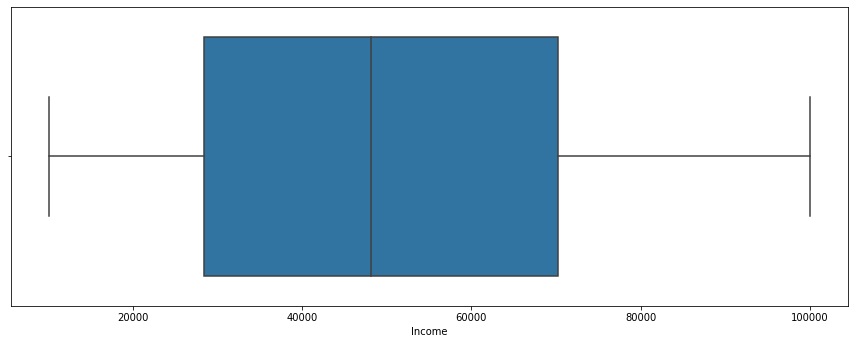

In [24]:
plt.figure(figsize = (15,5.5))

sns.boxplot(marketing_df['Income'])

In [26]:
stats.anderson(marketing_df['Income'], dist='norm')
# As stats > critical so Ho is false ( it is not normal)

AndersonResult(statistic=94.67577589420944, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [27]:
_ , l = stats.boxcox(marketing_df['Income'])
l

0.44437538279540056

In [34]:
l1 = np.array([1,2,3,4])
print(np.sqrt(l1,0.44)) # Seems not possible 


TypeError: return arrays must be of ArrayType

<AxesSubplot:xlabel='Income'>

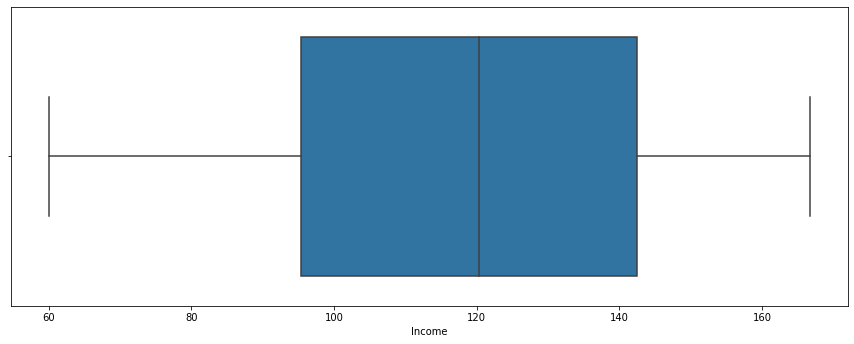

In [38]:
plt.figure(figsize = (15,5.5))
# Now it looks good
sns.boxplot(marketing_df['Income'].apply(lambda x : np.power(x,l)))

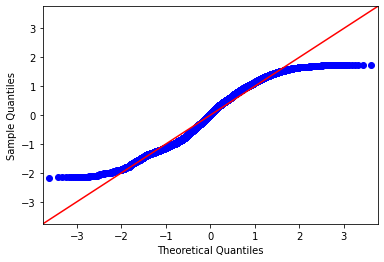

In [41]:
marketing_df['Income_2'] = marketing_df['Income'].apply(lambda x : np.power(x,l))
plot = sm.qqplot(marketing_df['Income_2'], line='45', fit = True)

In [42]:
# In order to verify weather it is originally transfored
_ , l = stats.boxcox(marketing_df['Income_2'])
l

1.0000001881629772

# Amore complex example

<AxesSubplot:xlabel='CLV'>

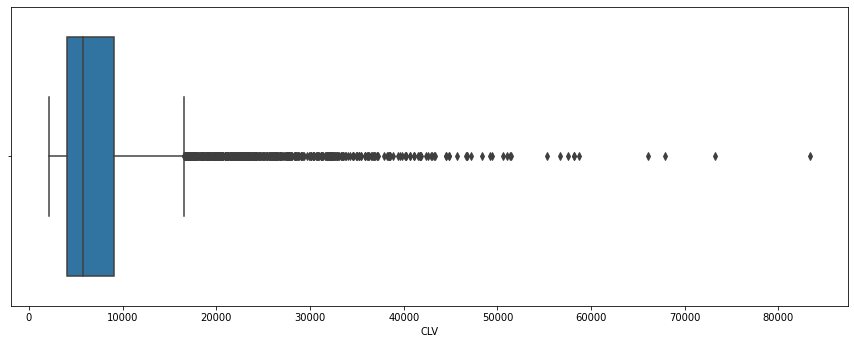

In [43]:
plt.figure(figsize = (15,5.5))
sns.boxplot(marketing_df['CLV'])

In [44]:
_ , l = stats.boxcox(marketing_df['CLV'])
l

-0.3628046005612987

<AxesSubplot:xlabel='CLV'>

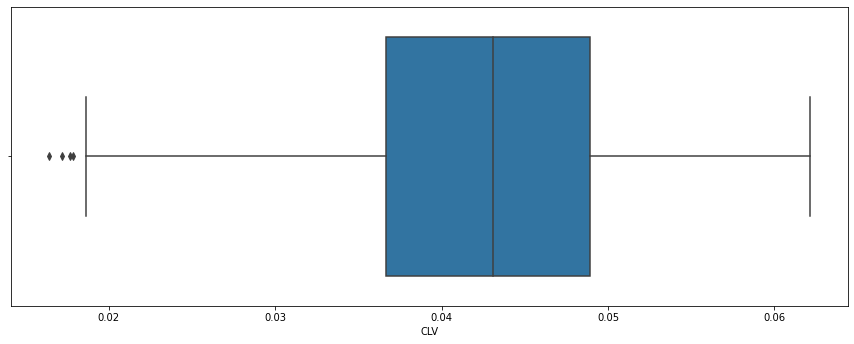

In [45]:
plt.figure(figsize = (15,5.5))
# Now it looks good
sns.boxplot(marketing_df['CLV'].apply(lambda x : 1/np.power(x,np.abs(l))))

In [46]:
# In order to verify weather it is originally transfored
_ , l = stats.boxcox(marketing_df['CLV'].apply(lambda x : 1/np.power(x,np.abs(l))))
l

0.9999998972585702